**Logistic regression** 

its a statistical method used for binary classification, predicting the probability of a binary outcome (0 or 1). It uses a sigmoid function to map input features to a probability between 0 and 1.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../sample_data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**df.isnull()** detects missing values within the dataframe. shows True if the value is NaN otherwise False.

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

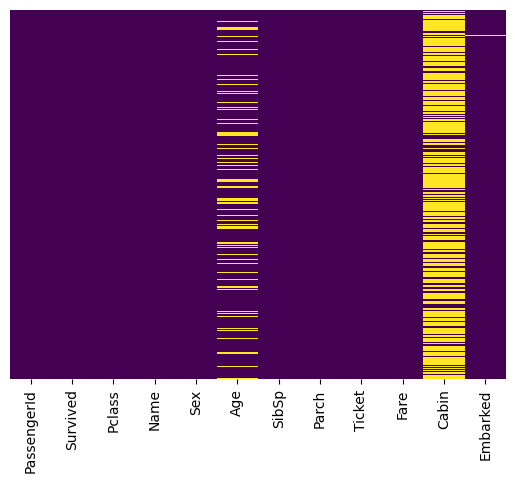

In [12]:
sns.heatmap(df.isnull(), yticklabels = False,cbar = False,cmap = 'viridis')

**heatmap()** is used to visualize matrix like data.

**yticklabels = False**: This argument tells seaborn not to display the labels for the y-axis (the row labels). This is often done when you have a very large number of rows and displaying all the labels would make the plot unreadable.

**cbar = False**: This argument tells seaborn not to display the color bar next to the heatmap. A color bar typically indicates what each color on the heatmap represents in terms of numerical values. Since df.isnull() gives us only True or False, a color bar isn't very useful here.

here in this case, Where you see a bright yellow (or whatever the high end of your viridis colormap looks like) block, that indicates a missing value (True from df.isnull()).

In [13]:
x = df['Age'].mean()
df['Age'].fillna(x,inplace = True)

C:\Users\megha\AppData\Local\Temp\ipykernel_7212\2306657208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(x,inplace = True)


<Axes: xlabel='Survived', ylabel='count'>

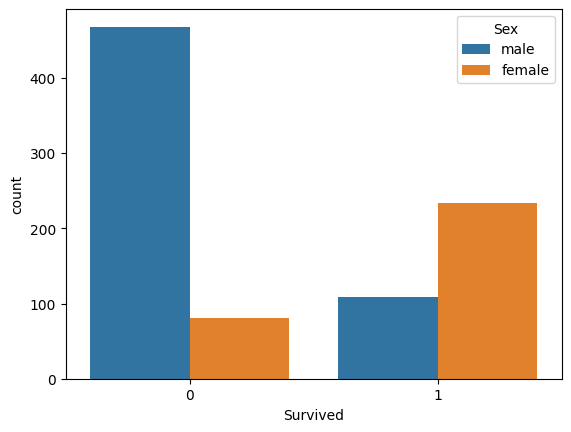

In [14]:
sns.countplot(x='Survived',hue = 'Sex',data=df)

C:\Users\megha\AppData\Local\Temp\ipykernel_7212\552284199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde = False,bins = 15)


<Axes: xlabel='Age'>

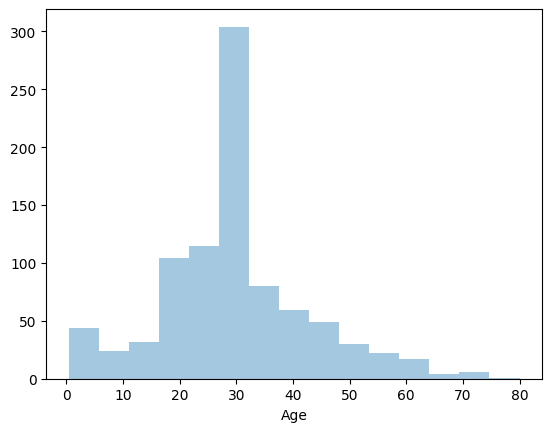

In [15]:
sns.distplot(df['Age'].dropna(),kde = False,bins = 15)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='SibSp', ylabel='count'>

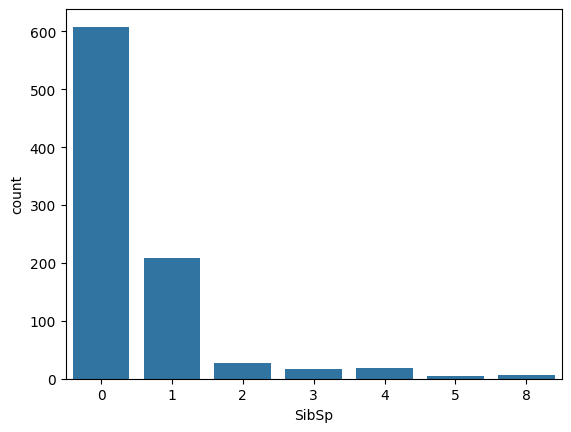

In [17]:
sns.countplot(x= 'SibSp',data = df)

SibSp - indicates, Siblings/Spouses Aboard. this shows thatthere are less number of spouses and siblings aboard.

<Axes: >

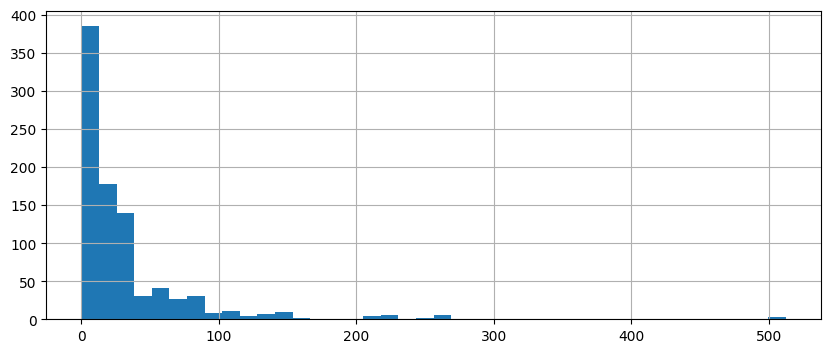

In [18]:
df['Fare'].hist(bins = 40,figsize = [10,4])

 'Fare' data will be divided into 40 equal-width ranges, and the height of each bar will represent how many data points fall into that range. More bins can show finer details but might make the plot appear noisy, while fewer bins can smooth out the distribution but might hide details.

<Axes: xlabel='Pclass', ylabel='Age'>

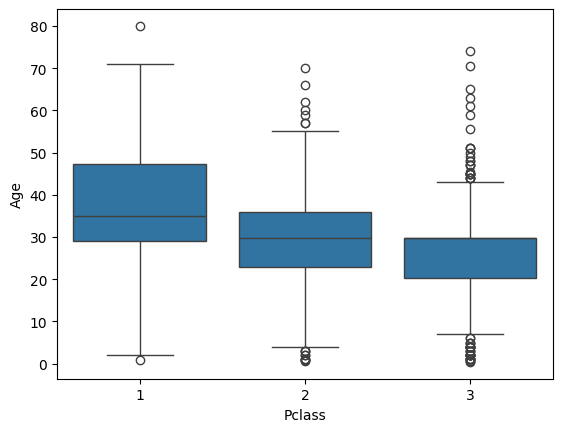

In [19]:
sns.boxplot(x= 'Pclass',y = 'Age',data = df)

Let's fill the null values with average values.

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull('Age'):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

This function's purpose is to strategically fill in (impute) missing Age values using the median age observed for each Pclass. as per the above boxplot.

In [21]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis = 1)

C:\Users\megha\AppData\Local\Temp\ipykernel_7212\3565552797.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\megha\AppData\Local\Temp\ipykernel_7212\3565552797.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

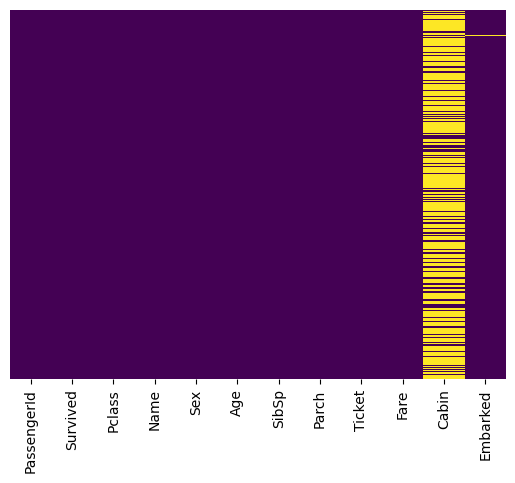

In [22]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'viridis')

In [23]:
df.drop('Cabin',axis = 1,inplace = True)

<Axes: >

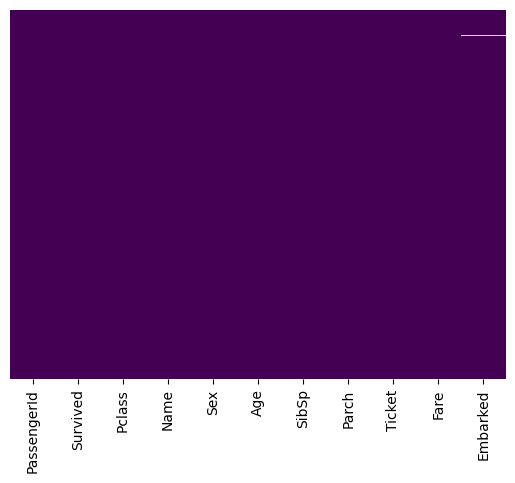

In [24]:
sns.heatmap(df.isnull(),cbar = False,cmap = 'viridis',yticklabels = False)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


let's do one hot encoding for "Embarked" column

In [26]:
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex        Age  SibSp  Parch              Ticket      Fare Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.000000      1      0           A/5 21171    7.2500        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.000000      1      0            PC 17599   71.2833        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.000000      0      0    STON/O2. 3101282    7.9250        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1      0              113803   53.1000        S
4              5         0       3           

In [37]:
sex = pd.get_dummies(df['Sex'],dtype = int)
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
sex = pd.get_dummies(df['Sex'],drop_first = True,dtype = int)
embark = pd.get_dummies(df['Embarked'],drop_first = True,dtype = int)

**pd.get_dummies()** - converts the categorical variable to numerical format - this is used for one hot encoding. each new column represents one unique category, and the values are 0 or 1.
If you have a column Color with values ['Red', 'Blue', 'Green']:
get_dummies() would create three new columns: Color_Red, Color_Blue, Color_Green.
If a row had Color = 'Red', then Color_Red would be 1, and Color_Blue, Color_Green would be 0.

**drop_first = True**  -  in this example, If 'Female' comes first alphabetically, get_dummies would create 'Sex_Female' and 'Sex_Male'. With drop_first=True, it would keep only Sex_Male.

If Sex_Male is 1, the original 'Sex' was 'Male'.

If Sex_Male is 0, the original 'Sex' was 'Female'.

**dtype = int**  - This specifies the data type of the new dummy columns. By default, get_dummies might create boolean columns (True/False). Setting dtype=int ensures they are 0s and 1s (integers), which is usually preferred for numerical operations in ML models.

In [35]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


in the above column, 'embark' default is c, q is 0 and s is 1

In [37]:
df = pd.concat([df, sex, embark], axis=1)

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [39]:
df.drop(['PassengerId','Ticket','Name','Sex','Embarked'],axis = 1,inplace = True)

In [40]:
print(df.to_string())

     Survived  Pclass        Age  SibSp  Parch      Fare  male  Q  S
0           0       3  22.000000      1      0    7.2500     1  0  1
1           1       1  38.000000      1      0   71.2833     0  0  0
2           1       3  26.000000      0      0    7.9250     0  0  1
3           1       1  35.000000      1      0   53.1000     0  0  1
4           0       3  35.000000      0      0    8.0500     1  0  1
5           0       3  29.699118      0      0    8.4583     1  1  0
6           0       1  54.000000      0      0   51.8625     1  0  1
7           0       3   2.000000      3      1   21.0750     1  0  1
8           1       3  27.000000      0      2   11.1333     0  0  1
9           1       2  14.000000      1      0   30.0708     0  0  0
10          1       3   4.000000      1      1   16.7000     0  0  1
11          1       1  58.000000      0      0   26.5500     0  0  1
12          0       3  20.000000      0      0    8.0500     1  0  1
13          0       3  39.000000  

In [41]:
x = df.drop(['Survived'],axis = 1)
y = df['Survived']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 101)

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\megha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [46]:
pred = log_model.predict(x_test)

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [48]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[148  21]
 [ 40  86]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       169
           1       0.80      0.68      0.74       126

    accuracy                           0.79       295
   macro avg       0.80      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



**confusion matrix** - helps you see where your model made correct predictions and where it got "confused." 
Mapping your numbers to this structure:

TN (True Negatives) = 148: The model correctly predicted 148 instances as 0 when they were actually 0. (Good!)

FP (False Positives) = 21: The model incorrectly predicted 21 instances as 1 when they were actually 0. (Type I error)

FN (False Negatives) = 40: The model incorrectly predicted 40 instances as 0 when they were actually 1. (Type II error)

TP (True Positives) = 86: The model correctly predicted 86 instances as 1 when they were actually 1. (Good!)

**classification report** -  provides key metrics calculated from the confusion matrix for each class, as well as overall averages.

Let's take class 0 as example,

**support**: This is the actual total number of instances for class 0 in your dataset.
Calculated as: TN + FP = 148 + 21 = 169.

**precision**: 0.79
For class 0, precision answers: "Out of all instances predicted as 0, how many were actually 0?"
Formula: TN / (TN + FN) (where FN here are instances incorrectly predicted as 0).
Calculation: 148/(148+40)=148/188≈0.787→0.79
Interpretation: When your model predicts something is class 0, it's correct 79% of the time.

**recall**: 0.88
For class 0, recall answers: "Out of all instances that were actually 0, how many did the model correctly predict as 0?"
Formula: TN / (TN + FP)
Calculation: 148/(148+21)=148/169≈0.875→0.88
Interpretation: Your model identified 88% of all actual class 0 instances.

**f1-score**: 0.83
The F1-score is the harmonic mean of precision and recall. It's a good single metric when you need a balance between precision and recall, especially if you have imbalanced classes.
Formula: 2∗(Precision∗Recall)/(Precision+Recall)
Calculation: 2∗(0.79∗0.88)/(0.79+0.88)≈0.83